In [7]:
import numpy as np
import pylhe
import math
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def invariant_mass(p1):
    return math.sqrt(sum((1 if index=='e' else -1)* getattr(p1, index)**2 for index in ['e','px','py','pz']))
    #return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index)+getattr(p3,index)+getattr(p4,index))**2 for index in ['e','px','py','pz']))

def transverse_mass(p1):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','pz']))

In [3]:
LHE_file = pylhe.readLHE('/workspace/Att_400s/Events/run_01/unweighted_events.lhe')
event_list = []
for i, event in enumerate (LHE_file):
    event_list.append(event)

In [5]:
dir(event_list[0].particles[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

In [8]:
m, id, mother1, mother2, e, px, py, pz, status = [], [], [], [], [], [], [], [], []
for i, element in enumerate(event_list[1].particles):
    m.append(element.m)
    id.append(element.id)
    mother1.append(element.mother1)
    mother2.append(element.mother2)
    e.append(element.e)
    px.append(element.px)
    py.append(element.py)
    pz.append(element.pz)
    status.append(element.status)
    
p = ['g', 'q', 't', 'W+', 'A0', 't', 'W+', 't~', 'W-', 'e+', 've', 'b', 'u', 'd', 'b', 'c', 's', 'b~']
print(len(p))
fd = pd.DataFrame({
      'mass': m,
      'PID': id,
      'Particle': p,
      'mother1': mother1,
      'mother2': mother2,
      'e': e,
      'px': px,
      'py': py,
      'pz': pz,
      'status': status})
fd

18


,mass,PID,Particle,mother1,mother2,e,px,py,pz,status
0,0.000000,21.0,g,0.0,0.0,409.493776,0.000000,0.000000,409.493776,-1.0
1,0.000000,4.0,q,0.0,0.0,348.673361,-0.000000,-0.000000,-348.673361,-1.0
2,172.601919,6.0,t,1.0,2.0,314.258861,17.056130,33.950287,259.853181,2.0
3,83.387344,24.0,W+,3.0,3.0,213.339537,42.379114,-33.010757,188.877234,2.0
4,394.964533,5000001.0,A0,1.0,2.0,443.908276,-17.056130,-33.950287,-199.032766,2.0
5,183.156791,6.0,t,5.0,5.0,263.951714,32.155043,-42.307372,-182.483525,2.0
6,81.276178,24.0,W+,6.0,6.0,146.065377,-10.469528,-88.189263,-82.718318,2.0
7,172.101442,-6.0,t~,5.0,5.0,179.956562,-49.211173,8.357086,-16.549241,2.0
8,73.757832,-24.0,W-,8.0,8.0,121.053095,-93.997281,-9.740954,16.830302,2.0
9,0.000000,-11.0,e+,4.0,4.0,87.833333,11.574664,26.702609,82.871540,1.0


In [11]:
m, mT, mi = [], [], []
for event in pylhe.readLHE('/workspace/Att_400s/Events/run_01/unweighted_events.lhe'):
  mT.append(transverse_mass(event.particles[4])) 
  m.append(invariant_mass(event.particles[4]))

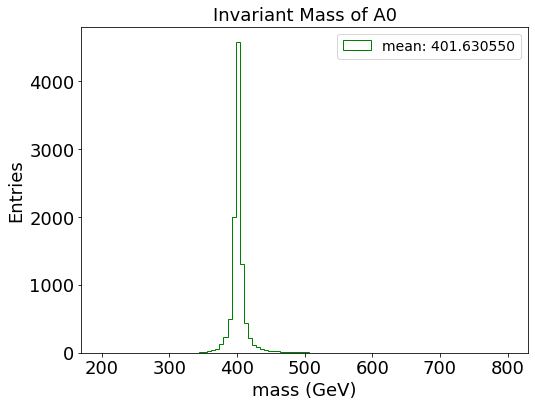

In [12]:
bins = 100
fs=18 
tagsize = 14
plt.figure(figsize=(8,6)) 
x1, x2 = 200, 800
plt.hist(m ,bins=bins, histtype='step',  range=[x1, x2], color='green', label='mean: %f' %np.average(m))
plt.legend(prop={'size': tagsize})
plt.xlabel('mass (GeV)' , fontsize=fs) 
plt.ylabel("Entries", fontsize=fs) 
plt.title('Invariant Mass of A0', fontsize=fs)
plt.xticks(fontsize=fs) 
plt.yticks(fontsize=fs) 
plt.show()

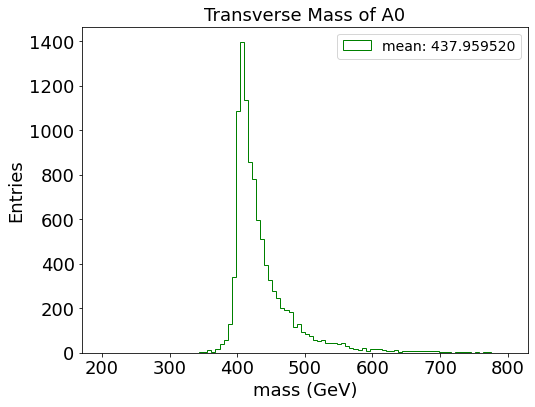

In [13]:
bins = 100
fs=18 
tagsize = 14
plt.figure(figsize=(8,6)) 
x1, x2 = 200, 800
plt.hist(mT ,bins=bins, histtype='step',  range=[x1, x2], color='green', label='mean: %f' %np.average(mT))
plt.legend(prop={'size': tagsize})
plt.xlabel('mass (GeV)' , fontsize=fs) 
plt.ylabel("Entries", fontsize=fs) 
plt.title('Transverse Mass of A0', fontsize=fs)
plt.xticks(fontsize=fs) 
plt.yticks(fontsize=fs) 
plt.show()